<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме на hh.ru

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитаем данные

In [2]:
# Читаем основной файл-csv
headhunter_data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

# Создаём копию основного файла
headhunter_df = headhunter_data.copy() 

2. Выводим первые 5 строк

In [ ]:
display(headhunter_df.head())

3. Выводим основную информацию о числе непустых значений в столбцах и их типах

In [ ]:
display(headhunter_df.info()) 

4. Выводим основную информацию о числе непустых значений в столбцах и их типах

In [ ]:
display(headhunter_df.isnull().sum())

5. Выводим основную статистическую информацию о столбцах


In [ ]:
display(headhunter_df.describe()) 

# Преобразование данных

1. С помощью функции-преобразования создаём новый признак **"Образование"**, который будет иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

In [3]:
def get_education_level(education):
    # Создаём список с указанием уровня образования.
    education_list = ['высшее', 'специальное']   
    # С помощью метода split() разбиваем строку по прабелам, и полученный список заносим в переменную string_list.
    string_list = education.split(' ')
    education_type = string_list[0]
    if string_list[1] in education_list:
        education_type += ' ' + string_list[1]
    return education_type

education_types = headhunter_df['Образование и ВУЗ'].apply(get_education_level)
headhunter_df['Образование'] = education_types
headhunter_df = headhunter_df.drop('Образование и ВУЗ', axis=1)

# Количество соискателей, имеющих среднее образование.
display(headhunter_df['Образование'].value_counts())


Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Из столбца **"Пол, возраст"** создадим два новых признака **"Пол"** и **"Возраст"**. При этом:
* Признак пола будет иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста будет представлен целыми числами.

In [4]:
# Выделяем признак 'Пол'
def get_gender(gender):
    male = 'М'
    female = 'Ж'
    
# С помощью метода split() разбиваем строку по прабелам, и полученный список заносим в переменную string_list
    string_list = gender.split(' ')
    gender_type = string_list[0]
    if string_list[0] == 'Мужчина':
        gender_type = male
    if string_list[0] == 'Женщина':
        gender_type = female
    return gender_type

# Выделяем признак 'Возраст'
def get_age(age):
    string_list = age.split(' ')
    int_list = []
    for value in string_list:
        try:
            int_value = int(value)
            int_list.append(int_value)
        except ValueError:
            continue
    age = int_list[0]
    return age
        
    
gender_types = headhunter_df['Пол, возраст'].apply(get_gender)
headhunter_df['Пол'] = gender_types    
age_types = headhunter_df['Пол, возраст'].apply(get_age)
headhunter_df['Возраст'] = age_types
headhunter_df = headhunter_df.drop('Пол, возраст', axis=1)  

# Доля женских резюме в данных
female_resumes = (headhunter_df['Пол'].value_counts(normalize=True))*100
display(round(female_resumes, 2))

# Средний возраст соискателей
mean_age = headhunter_df['Возраст'].mean()
display(round(mean_age, 1))

М    80.93
Ж    19.07
Name: Пол, dtype: float64

32.2

3. Следующим этапом преобразуем признак **"Опыт работы"**. 

Из столбца выделим общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

In [5]:
# Переводим рабочий стаж в месяцы.
def get_experience(arg):
    if arg is np.nan:
        return None
    month_words = ['месяц', 'месяцев', 'месяца']
    year_words = ['год', 'года', 'лет']
    arg_split = arg.split(' ')[:7]
    number_years = 0
    number_months = 0
    total_number_months = 0
    for index, values in enumerate (arg_split):
        if values in month_words:
            number_months = int(arg_split[index-1])
        if values in year_words:
            number_years = int(arg_split[index-1])
        total_number_months = int((number_years)*12 + number_months)
    return total_number_months


# Создаём признак 'Опыт работы (месяц)'
headhunter_df['Опыт работы (месяц)'] = headhunter_df['Опыт работы'].apply(get_experience)

# Удаляем признак 'Опыт работы'
headhunter_df = headhunter_df.drop('Опыт работы', axis=1)

# Медианный опыт работы
display(int(headhunter_df['Опыт работы (месяц)'].median(axis=0)))

100

4. Далее работаем с признаком "Город, переезд, командировки". Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**.

In [6]:
# Выделяем признак 'Город'
def get_city(arg):
    main_cities = ['Москва', 'Санкт-Петербург']
    millionaire_city = [
        'Новосибирск', 
        'Екатеринбург', 
        'Нижний Новгород', 
        'Казань', 
        'Челябинск', 
        'Омск', 
        'Самара', 
        'Ростов-на-Дону', 
        'Уфа', 
        'Красноярск', 
        'Пермь', 
        'Воронеж', 
        'Волгоград' 
        ]
    string_list = arg.split(' ')
    city = string_list[0]
    if city in main_cities:
        return city
    elif city in millionaire_city:
        return 'город-миллионник'
    else:
        return 'другие'


# Выделяем признак 'Готовность к переезду'
def get_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
          
# Выделяем признак 'Готовность к командировкам'
def get_business_trip(arg):
    if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
        return False
    else:
        return True

        
cities = headhunter_df['Город, переезд, командировки'].apply(get_city) # Применяем функцию get_city (Город) к признаку 'Город, переезд, командировки'
ready_to_move = headhunter_df['Город, переезд, командировки'].apply(get_move) # Применяем функцию get_move (Готовность к переезду) к признаку 'Город, переезд, командировки'
ready_to_BusinessTrip = headhunter_df['Город, переезд, командировки'].apply(get_business_trip) # Применяем функцию get_business_trip (Готовность к командировкам) к признаку 'Город, переезд, командировки'

headhunter_df['Город'] = cities # Создаём признак 'Город'
headhunter_df['Готовность к переезду'] = ready_to_move # Создаём признак 'Готовность к переезду'
headhunter_df['Готовность к командировкам'] = ready_to_BusinessTrip # Создаём признак 'Готовность к командировкам'
headhunter_df = headhunter_df.drop('Город, переезд, командировки', axis=1) # Удаляем столбец 'Город, переезд, командировки'
living_in_SPB = (headhunter_df[headhunter_df['Город']=='Санкт-Петербург'].shape[0]) # Количество соискателей, живущих в Санкт-Петербурге
SPB_percent = ((living_in_SPB/44744) * 100) # Процент соискателей, живущих в Санкт-Петербурге
display(round(SPB_percent))

ready_to_move_and_BusinessTrip = (headhunter_df[(headhunter_df['Готовность к переезду']==True) & (headhunter_df['Готовность к командировкам']==True)].shape[0]) # Общее количество соискателей, готовых и к переезду, и к командировкам 
percentage_ready = ((ready_to_move_and_BusinessTrip/44744) * 100) # Процент соискателей, готовых и к переезду, и к командировкам
display(round(percentage_ready))

11

32

5. Рассмотрим признаки **"Занятость"** и **"График"**. Создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

In [7]:
# Создаём признаки графиков работы
employments = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for employment, chart in zip(employments, charts):
    headhunter_df[employment] = headhunter_df['Занятость'].apply(lambda x: employment in x)
    headhunter_df[chart] = headhunter_df['График'].apply(lambda x: chart in x)
    
project_work = headhunter_df['проектная работа']==True
volunteering = headhunter_df['волонтерство']==True
display(headhunter_df[project_work & volunteering].shape[0]) # Количество соискателей на позиции 'проектная работа' или 'волонтёрство'

shift_method = headhunter_df['вахтовый метод']==True
flexible_schedule = headhunter_df['гибкий график']==True
display(headhunter_df[shift_method & flexible_schedule].shape[0]) # Количество соискателей на позиции 'вахтовый метод' или 'гибкий график'

headhunter_df = headhunter_df.drop('Занятость', axis=1) # Удаляем признак 'Занятость'
headhunter_df = headhunter_df.drop('График', axis=1) # Удаляем признак 'График'

436

2311

6. Из столбца заработной платы **"ЗП"** с помощью признака **"Обновление резюме"** создадим признак **"ЗП (руб)"** - заработная плата в рублях. 

In [8]:
rates_data = pd.read_csv('ExchangeRates.csv', sep=',') # Создаём новый DataFrame из файла ExchangeRates.csv
rates_df = rates_data.copy() # Создаём копию файла


# Удаляем ненужные столбцы из таблицы "rates_df".
rates_df = rates_df.drop('per', axis=1)
rates_df = rates_df.drop('time', axis=1)
rates_df = rates_df.drop('vol', axis=1)


headhunter_df['Обновление резюме'] = pd.to_datetime(headhunter_df['Обновление резюме']) # Переводим признак 'Обновление резюме' в формат datetime
headhunter_df['Обновление резюме'] = headhunter_df['Обновление резюме'].dt.date # Из признака 'Обновление резюме' выделяем дату
headhunter_df['Обновление резюме'] = pd.to_datetime(headhunter_df['Обновление резюме']) # Обновлённый признак 'Обновление резюме' переводим в формат datetime
rates_df['date'] = pd.to_datetime(rates_df['date']) # Переводим признак 'date' в формат datetime


# Разделяем признак 'ЗП' на 2 других признака: 'Сумма ЗП' и 'Курс'
# Выделяем сумму ЗП в отдельный столбец
def get_salary(arg):
    salary_list = arg.split(' ')
    salary_list.remove(salary_list[1])
    new_arg = ''.join(salary_list)
    return new_arg

headhunter_df['Сумма ЗП'] = headhunter_df['ЗП'].apply(get_salary) # Создаём признак 'Сумма ЗП'


# Разделяем признак 'ЗП' на 2 других признака: 'Сумма ЗП' и 'Курс'.
# Выделяем наименование валюты и переводим его в стандарт ISO.
def get_currency(arg):
    salary_list = arg.split(' ')
    salary_list.remove(salary_list[0])
    currency = salary_list[0]
    if (currency=='руб.'):
        currency = 'RUB'
    if (currency=='грн'):
        currency = 'UAH'
    if (currency=='белруб'):
        currency = 'BYN'
    if (currency=='сум'):
        currency = 'UZS'
    salary_list.remove(salary_list[0])
    
    salary_list.append(currency)
    new_arg = ''.join(salary_list)
    return new_arg

headhunter_df['Курс'] = headhunter_df['ЗП'].apply(get_currency) # Создаём признак 'Курс' и выводим его
headhunter_df.loc[headhunter_df['Курс']=='бел.руб.', 'Курс'] = 'BYN' # Заменяем значение бел.руб. в столбце 'Курс' на BYN
headhunter_df.loc[headhunter_df['Курс']=='грн.', 'Курс'] = 'UAH' # Заменяем значение грн. в столбце 'Курс' на UAH
headhunter_df = headhunter_df.drop('ЗП', axis=1) # Удаляем признак 'ЗП'


# Соединяем таблицы "headhunter_df" и "rates_df".
headhunter_merged = headhunter_df.merge(
    rates_df,
    left_on=['Курс', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)


headhunter_merged['currency'] = headhunter_merged['currency'].fillna('RUB') # Заполняем значения NaN в столбце 'currency' на RUB
headhunter_merged['close'] = headhunter_merged['close'].fillna(1) # Заполняем значения NaN в столбце 'close' на 1
headhunter_merged['proportion'] = headhunter_merged['proportion'].fillna(1) # Заполняем значения NaN в столбце 'proportion' на 1
headhunter_merged['Сумма ЗП'] = pd.to_numeric(headhunter_merged['Сумма ЗП']) # Переводим тип столбца "Сумма ЗП" из 'object' в 'int64'
headhunter_merged['ЗП (руб)'] = (headhunter_merged['Сумма ЗП']*headhunter_merged['close']) // headhunter_merged['proportion'] # Умножаем сумму желаемой заработной платы на присоединённый курс валюты (close) и делим на пропорцию
headhunter_merged = headhunter_merged.drop('Сумма ЗП', axis=1) # Удаляем признак 'Сумма ЗП'
display(headhunter_merged['ЗП (руб)'].median())

59018.5

# Исследование зависимостей в данных

1. Построим распределение признака **"Возраст"**. 

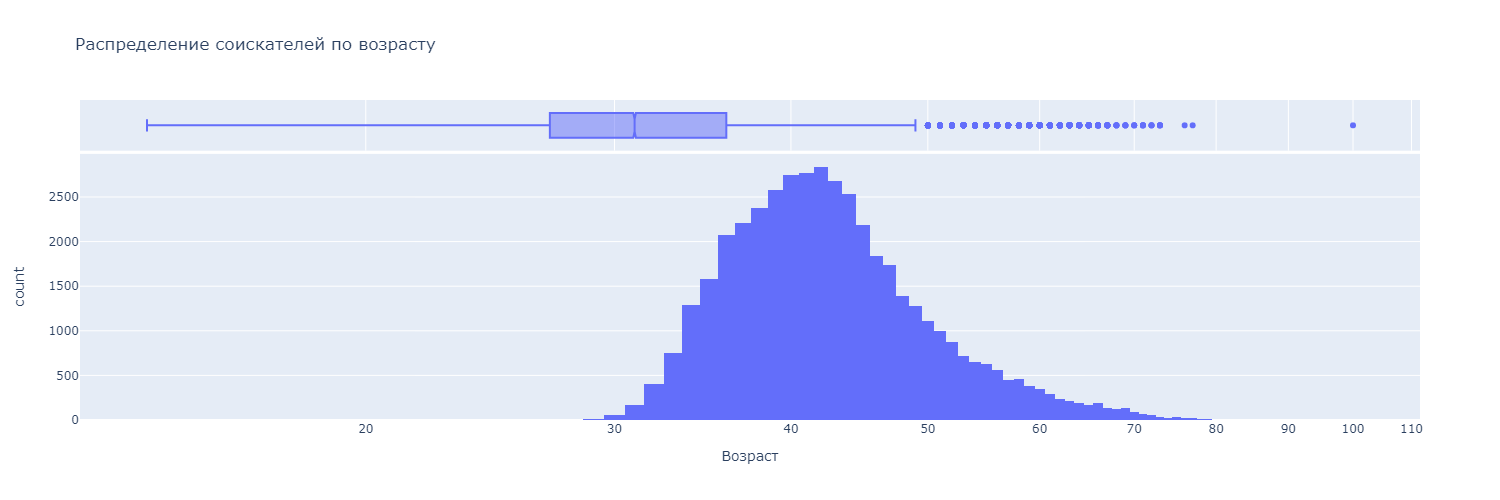

In [9]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
fig = px.histogram(
    data_frame=headhunter_merged,
    marginal='box',
    x='Возраст',
    title='Распределение соискателей по возрасту',
    width=1500,
    log_x= True
)
fig.show('png')

Вывод: Общая гистограмма показывает, что средний возраст наибольшего количества соискателей составляет 30 лет, причём минимальный возраст соискателей составляет 17 лет, и далее с возрастом количество соискателей резко возрастает. Максимальный возраст находится в диапазоне от 65 до 77 лет. Так же из гистограммы можно заключить, что средний возраст большинства соискателей находится в интервале от 22 лет (1284 человека), до 38 лет (1110 человек). На данных графиках можно наблюдать одно аномальное значение: среди общего количества соискателей присутствует человек, возраст которого равняется 100 годам, в следствие чего в статистику его не квлючаем.

2. Построим распределение признака **"Опыт работы (месяц)"**.

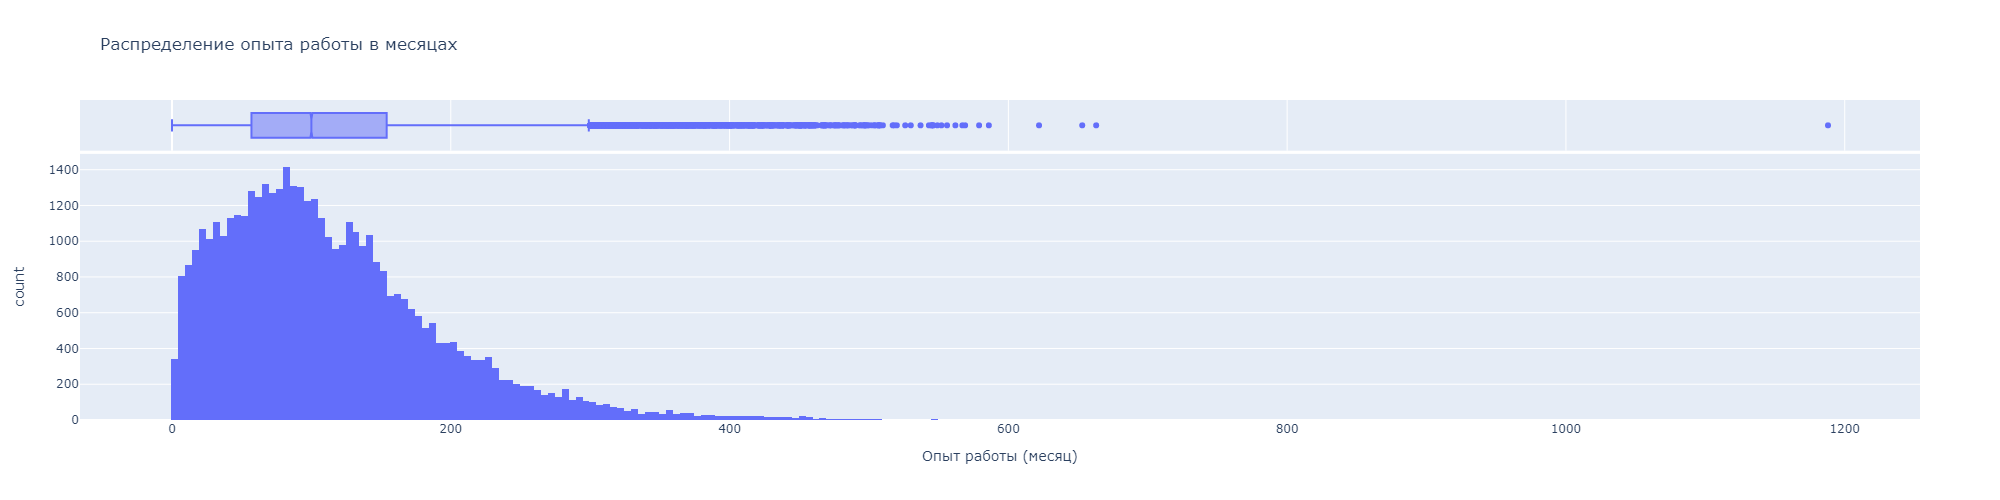

In [10]:
fig = px.histogram(
    data_frame=headhunter_merged,
    marginal='box',
    x='Опыт работы (месяц)',
    title='Распределение опыта работы в месяцах',
    width=2000,
    height=500,
)
fig.show('png')

Вывод: Общая гистограмма показывает, что у наибольшего количества соискателей (1414 человек) опыт работы находится в интервале от 80 до 84 месяцев. Причём количество соискателей с наименьшим опытом (от 0 до 4 месяцев), составляет 342 человека. Касаемо самых опытных соискателей (опыт работы от 565 до 569 месяцев), их количество составляет всего 2 человека. Такое маленькое количество среди самых опытных соискателей объясняется пожилым возрастом, а также слабым здоровьем граждан, входящих в данную возрастную категорию. Также в признаке присутствуют аномальные значения, для которых опыт работы находится в интервале от 600 месяцев и более. Данные значения не будут учитываться.

3. Построим распределение признака **"ЗП (руб)"**.

In [12]:
import plotly.express as px
fig = px.histogram(
    data_frame=headhunter_merged,
    x='ЗП (руб)',
    marginal='box',
    title='Распределение заработной платы',
    height=500,
    width=40000,
)

fig.show('png')

Вывод: Общая гистограмма показывает, что предельные значения признака заработной платы находятся в интервале от 5000 до 1М рублей, причём желаемая заработная плата большинства соискателей находится в интервале от 50000 до 55000 рублей. 

В данном признаке также наблюдаются 5 аномалий в виде уровня желаемой ЗП от 1.75М до 24М рублей, что не может соответствовать действительности. Данные показатели необходимо исключит из статистики.

4. Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**).

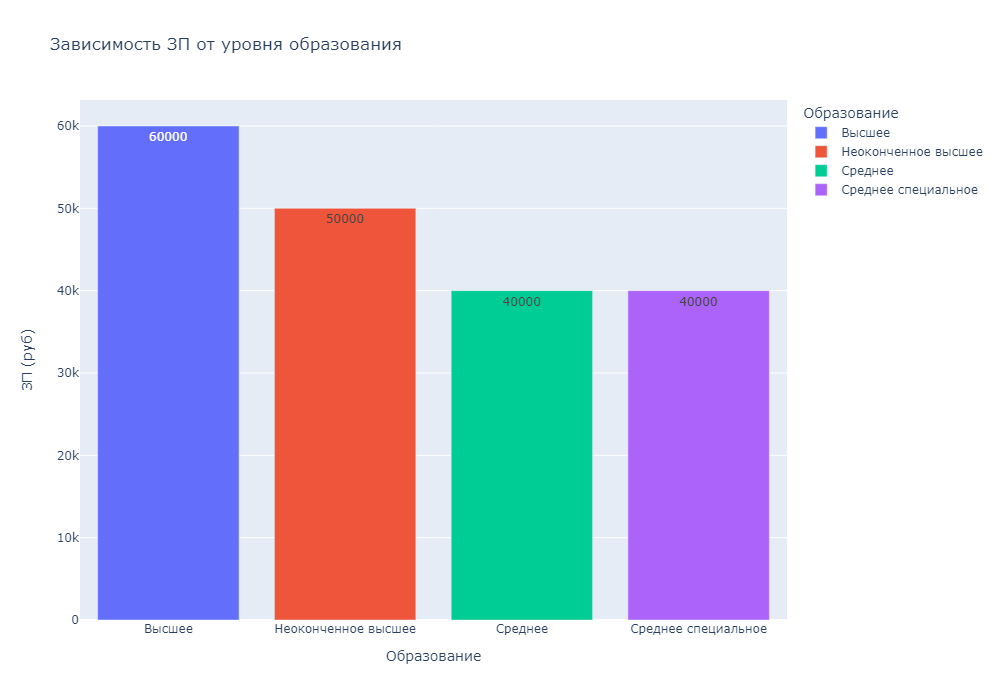

In [13]:
bar_data1 = headhunter_merged.groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()

fig = px.bar(
    data_frame=bar_data1,#датафрейм
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    text='ЗП (руб)',
    height=700,
    width=1000,
    title='Зависимость ЗП от уровня образования'
)

fig.show('png')

Вывод: Из диаграммы можно сделать вывод, что наибольший уровень желаемой заработной платы наблюдается у соискателей, имеющих высшее образование. Желаемая заработная плата кандидатов данной категории составляет 60000 рублей. 

Наименьший уровень заработной платы наблюдается у кандидатов, имеющих среднее и среднее специальное образование. Желаемая заработная плата соискателей из данной категории составляет 40000 рублей.

Признак уровня образования играет существенную роль при прогнозировании заработной платы ввиду того, чем выше уровень образования представителей наибольшего числа профессий,тем выше его квалификация, а следовательно тем выше они ценятся на рынке труда и соответственно оплата их услуг должна быть больше.

5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**).

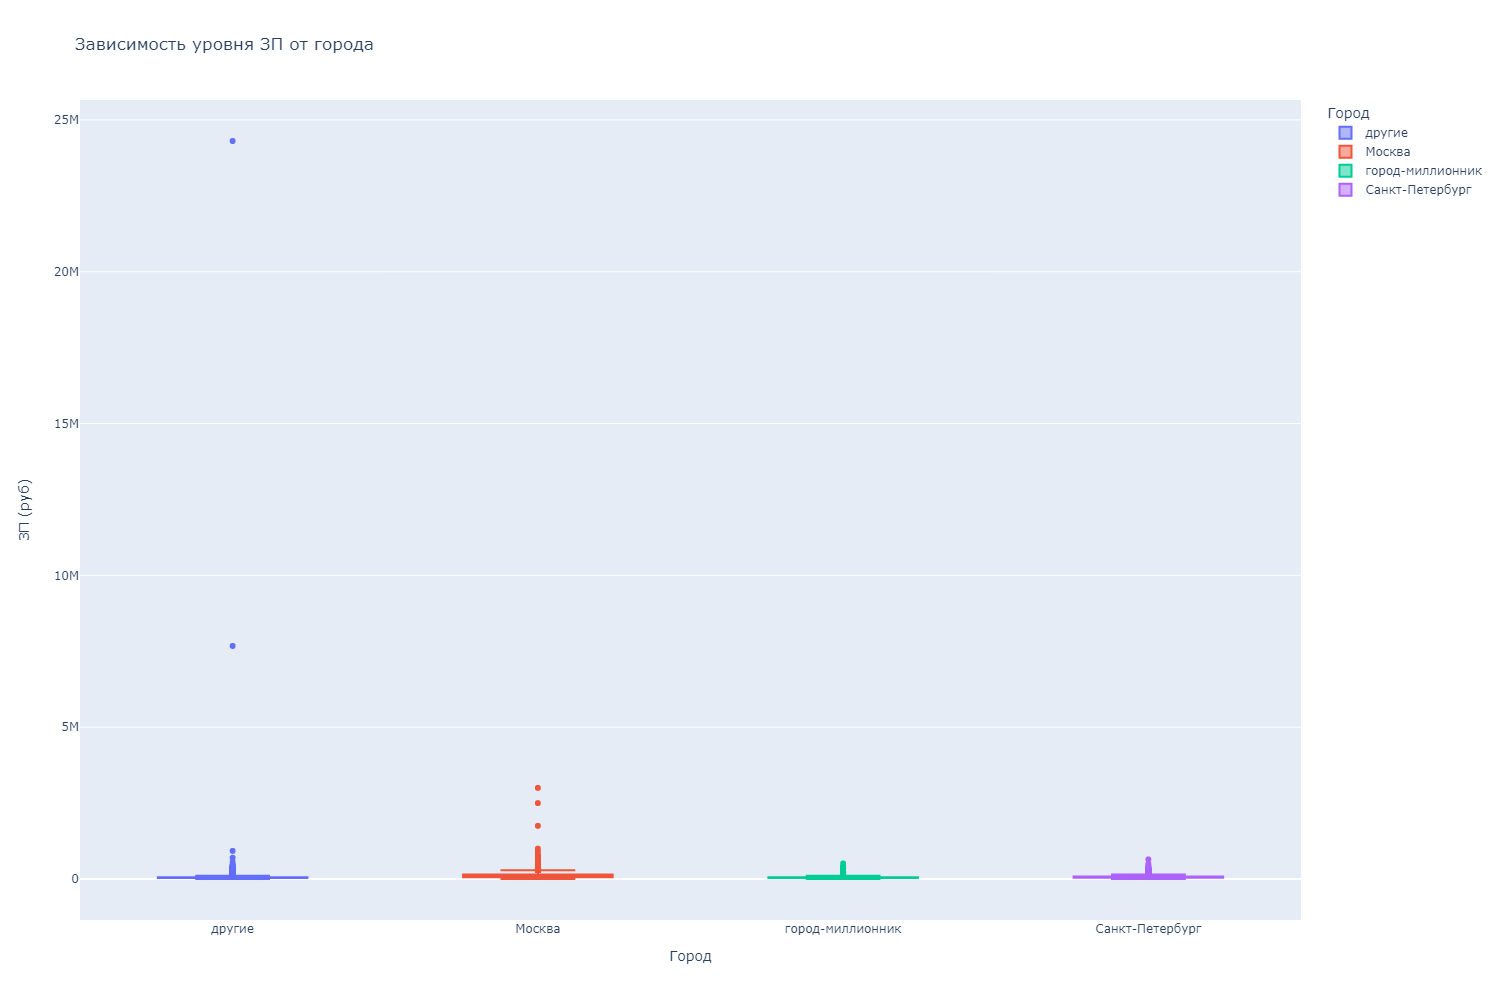

In [14]:
import plotly
import plotly.express as px

fig = px.box(
    data_frame=headhunter_merged, 
    x='Город',
    y='ЗП (руб)',
    color='Город',
    height=1000,
    width=1500,
    orientation='v',
    title='Зависимость уровня ЗП от города'
)
fig.show('png')

Вывод: Из данной диаграммы можно заключить, что размер города, а также количество жителей соотносятся прямопропорционально с уровнем желаемой заработной платы, т.е. чем больше город и его население, тем выше желаемая заработная плата. По примеру Москвы мы можем видеть, что здесь наблюдается самый высокий уровень желаемой ЗП, он равен 285к руб.. Это связано в первую очередь с тем, что Московская область является самым развитым, крупным и самым населённым регионом в стране. Также в Москве сосредоточено самое большое количество высших учебных заведений и самое большое количество рабочих мест. После Москвы самым развитым городом является Санкт-Петербург, здесь уровень желаемой заработной платы составляет 145к рублей.

При прогнозировании заработной платы признак города имеет очень важную роль, т.к. учитываются такие элементы, как уровень населения, развитие рассматриваемого региона, инфраструктура, и прочее. Совокупность всех этих факторов влияет на уровень ЗП.

6. Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. 

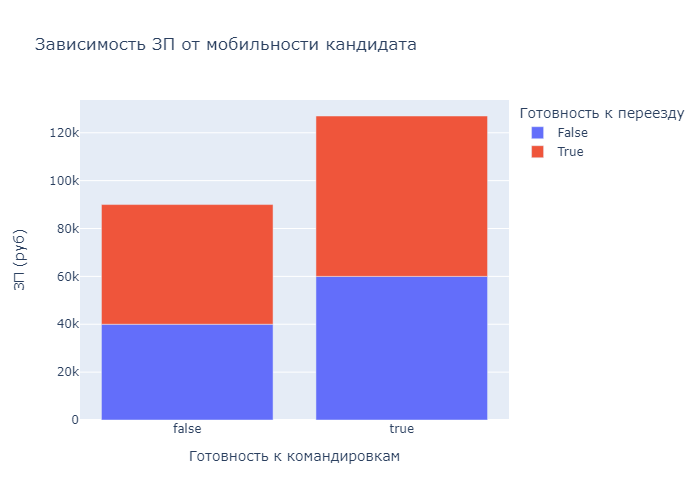

In [15]:
bar_data = headhunter_merged.groupby(
    by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False
    )[['ЗП (руб)']].median()

fig = px.bar(
    data_frame=bar_data,
    x='Готовность к командировкам',
    y='ЗП (руб)',
    color='Готовность к переезду',
    title='Зависимость ЗП от мобильности кандидата'
)

fig.show('png')

Вывод: Из данной диаграммы можно сделать вывод, что признак ЗП имеет прямопропорциональную зависимость от показателей мобильности кандидата. Самый низкий уровень ЗП в размере 40к рублей предлагается кандидатам, не готовым ни к переезду, ни к командировкам. Соискателям, готовым к командировкам, но не готовым к переезду предлагают более высокую ЗП (в размере 60к рублей) чем тем, которые готовы к переезду, но не к командировкам (за их услуги предлагают 50к рублей). Самую же высокую ЗП (в размере 67к рублей) предлагают наиболее мобильным кандидатам, которые готовы и к переезду, и к командировкам. Это связано с тем, что работодатель может задействовать подчинённого в необходимом месте и на необходимый срок.

7. Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**.

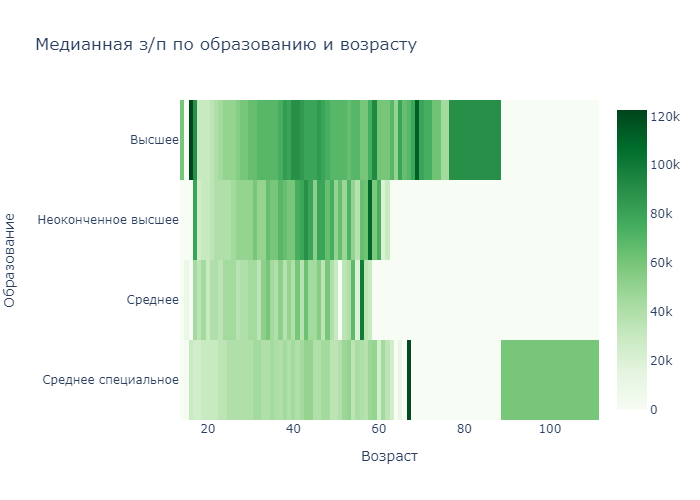

In [16]:
pivot = headhunter_merged.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)

fig = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='greens',
    title='Медианная з/п по образованию и возрасту'
)
fig.show('png')

Вывод: По тепловой карте можно заключить, что медианная ЗП имеет прямопропорциональную зависимость от возраста до 69 лет, а зависимость от уровня образования ещё больше. Медианная ЗП тех соискатели, которые находятся в возрастном диапазоне от 21 до 69 лет и имеющие высшее образование, растёт и находится в интервале от 30к до 112к рублей. 

У кандидатов, имеющих более низкий уровень образования, наблюдается похожая тенденция, только диапазоны возраста и ЗП ниже.

В данном признаке наблюдаются следующие аномалии: возрастной интервал кандидатов, имеющих высшее образование, находится в диапазоне от 14 лет, что не может соответствовать действительности, поэтому возрастная категория от 14 до 21 года не учитывается.

8. Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведём из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

Text(0, 0.5, 'Опыт работы (год)')

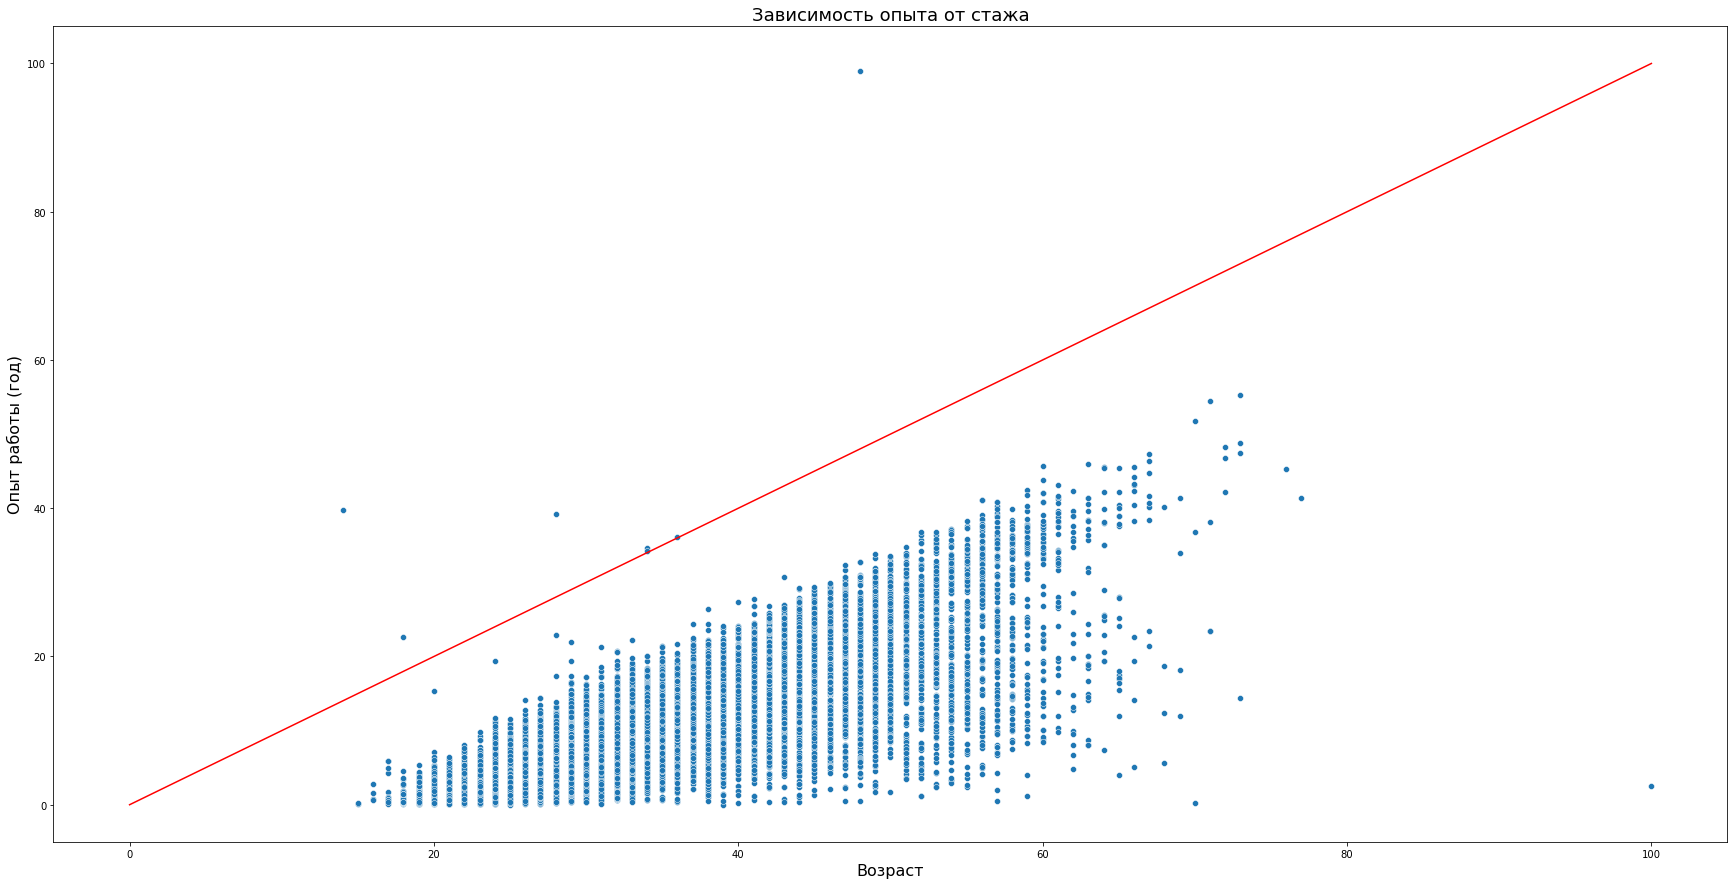

In [17]:
headhunter_merged['Опыт работы (год)'] = headhunter_merged['Опыт работы (месяц)'].apply(lambda x: x / 12)
fig, ax = plt.subplots(figsize=(30, 15))
scatplot = sns.scatterplot(
    x='Возраст',
    y='Опыт работы (год)',
    data=headhunter_merged    
);

sns.lineplot(x=[0, 100], y=[0, 100], color= 'Red');
scatplot.set_title('Зависимость опыта от стажа', fontsize=18);
scatplot.set_xlabel('Возраст', fontsize=16);
scatplot.set_ylabel('Опыт работы (год)', fontsize=16)

Вывод: Из данной диаграммы можно сделать вывод, что возраст и опыт работы имеют прямопропорциональную зависимость. В диаграмме также наблюдаются аномалии в количестве 7 точек, а именно: опыт работы либо равен, либо больше возраста соискателя. Данные аномалии не будут учитываться в статистике.

# Очистка данных

1. Найдём **полные дубликаты** в таблице с резюме и удалим их. 

In [18]:
dupl_columns = list(headhunter_merged.columns)
mask = headhunter_merged.duplicated(subset=dupl_columns)
merged_duplicates = headhunter_merged[mask]
display(f'Число найденных дубликатов: {merged_duplicates.shape[0]}')

merged_dedupped = headhunter_merged.drop_duplicates(subset=dupl_columns)
display(f'Результирующее число записей: {merged_dedupped.shape[0]}')

'Число найденных дубликатов: 161'

'Результирующее число записей: 44583'

2. Займемся пропусками. Выведем информацию **о числе пропусков** в столбцах. 

In [19]:
display(headhunter_merged['Опыт работы (месяц)'].isnull().value_counts())

False    44576
True       168
Name: Опыт работы (месяц), dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [20]:
headhunter_merged = headhunter_merged.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']) # Удаляем строки с пропусками
headhunter_merged['Опыт работы (месяц)'] = headhunter_merged['Опыт работы (месяц)'].fillna(headhunter_merged['Опыт работы (месяц)'].median()) # Пропуски заполняем медианным значением
display(round(headhunter_merged['Опыт работы (месяц)'].mean(), 2))

114.36

4. Ликвидация выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [21]:
display(headhunter_merged['ЗП (руб)'].describe()) # Рассчитаем статистические показатели для признака ЗП (руб)
display(headhunter_merged[headhunter_merged['ЗП (руб)'] > 1000000]) # Выводим резюме с ЗП > 1000000 руб
display(headhunter_merged[headhunter_merged['ЗП (руб)'] < 1000]) # Выводим резюме с ЗП < 1000 руб

sum_outliers = headhunter_merged[headhunter_merged['ЗП (руб)']>1000000].shape[0] + headhunter_merged[headhunter_merged['ЗП (руб)']<1000].shape[0] # Суммарное число выбросов по признаку 'ЗП (руб)'
display(sum_outliers)

# Удаляем данные резюме
headhunter_merged = headhunter_merged.drop(headhunter_merged[headhunter_merged['ЗП (руб)'] > 1000000].index, axis=0)
headhunter_merged = headhunter_merged.drop(headhunter_merged[headhunter_merged['ЗП (руб)'] < 1000].index, axis=0)
display(f'Результирующее число записей: {headhunter_merged.shape[0]}')

count    4.474200e+04
mean     7.653582e+04
std      1.359341e+05
min      1.000000e+00
25%      3.710900e+04
50%      5.903700e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,удаленная работа,стажировка,вахтовый метод,Курс,currency,date,close,proportion,ЗП (руб),Опыт работы (год)
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,Высшее,М,31,115.0,другие,...,True,False,False,USD,USD,2019-04-22,63.9602,1.0,24304876.0,9.583333
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,Высшее,М,39,280.0,Москва,...,True,False,True,RUB,RUB,NaT,1.0000,1.0,3000000.0,23.333333
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,Среднее специальное,М,29,98.0,другие,...,False,False,False,USD,USD,2019-04-22,63.9602,1.0,7675224.0,8.166667
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,Неоконченное высшее,М,24,39.0,Москва,...,True,False,False,RUB,RUB,NaT,1.0000,1.0,1750000.0,3.250000
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,Высшее,М,38,97.0,Москва,...,False,False,False,RUB,RUB,NaT,1.0000,1.0,2500000.0,8.083333


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,удаленная работа,стажировка,вахтовый метод,Курс,currency,date,close,proportion,ЗП (руб),Опыт работы (год)
253,Руководитель аналитики/crm/data science,РОСБАНК,Head of analytics and reporting in CRM,2019-10-04,Не указано,Высшее,М,34,154.0,Москва,...,False,False,False,RUB,RUB,NaT,1.0000,1.0,420.0,12.833333
514,"Oracle DBA, системный инженер",Банк,эксперт,2019-04-19,Не указано,Высшее,М,37,162.0,Москва,...,True,False,False,RUB,RUB,NaT,1.0000,1.0,160.0,13.500000
552,3D художник,ООО «Центр технологий и медиа групп»,3D-дизайнер,2019-04-26,Не указано,Высшее,М,27,48.0,другие,...,True,True,True,USD,USD,2019-04-26,64.6794,1.0,452.0,4.000000
1087,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-04-26,Не указано,Высшее,М,36,142.0,Москва,...,False,False,False,RUB,RUB,NaT,1.0000,1.0,1.0,11.833333
2248,"Электромонтер КИПиА, электромеханик, IT, сеть ...","СК ""Град""","Электромонтажник, ОПС, разнорабочий, стропольщик.",2019-04-16,Не указано,Среднее,М,31,62.0,другие,...,True,True,True,RUB,RUB,NaT,1.0000,1.0,250.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41742,web-дизайнер,Monstrptint.ru,Дизайнер. Криэйтор.,2019-08-04,Не указано,Высшее,Ж,44,149.0,Москва,...,True,False,False,RUB,RUB,NaT,1.0000,1.0,45.0,12.416667
42329,Инженер- программист,"OZON.ru, Интернет-магазин",Разработчик информационных систем,2018-05-12,Не указано,Неоконченное высшее,М,29,103.0,Москва,...,True,False,False,RUB,RUB,NaT,1.0000,1.0,140.0,8.583333
42841,Ведущий системный администратор,"ГАЗИНФОРМСЕРВИС, ООО",Старший инженер,2019-04-22,Не указано,Высшее,М,32,114.0,Санкт-Петербург,...,False,False,False,RUB,RUB,NaT,1.0000,1.0,85.0,9.500000
43385,Директор по управлению проектами / Директор по...,One Agile,Исполнительный директор,2019-07-05,Не указано,Высшее,М,46,282.0,Москва,...,False,False,False,RUB,RUB,NaT,1.0000,1.0,1.0,23.500000


89

'Результирующее число записей: 44653'

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдём такие резюме и удалим их из данных

In [22]:
display(f'Число записей в признаке Опыт работы (месяц): {headhunter_merged.shape[0]}')
outliers = headhunter_merged[headhunter_merged['Опыт работы (месяц)']/12 > headhunter_merged['Возраст']]
headhunter_merged = headhunter_merged.drop(outliers.index, axis=0)
display(f'Результирующее число записей: {headhunter_merged.shape[0]}')

'Число записей в признаке Опыт работы (месяц): 44653'

'Результирующее число записей: 44646'

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Построим распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**.

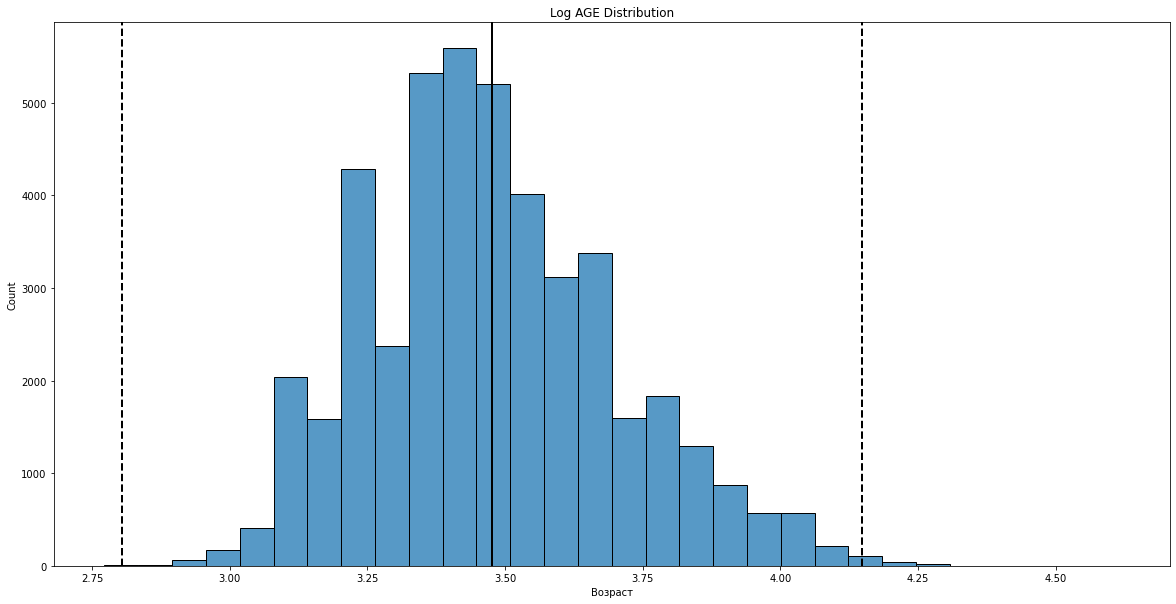

In [23]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
log_age = np.log(headhunter_merged['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3*log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3*log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log AGE Distribution');

Комментарий: Из данного интервала можно заметить, что среднее значение находится правее моды, это говорит о том, что данное распределение имеет правостороннюю ассиметрию.

In [24]:
# Находим выбросы с помощью метода z-отклонения и удалим их из данных
def outliers_z_score(headhunter_merged, feature, log_scale=False):
    if log_scale:
        x = np.log(headhunter_merged[feature]+1)
    else:
        x = headhunter_merged[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = headhunter_merged[(x < lower_bound) | (x > upper_bound)]
    cleaned = headhunter_merged[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(headhunter_merged, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44643


In [25]:
# Выводим потенциальные выбросы.
print(outliers['Возраст'].unique())

[ 15 100]
